imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr



Load data

In [2]:
model_scores = pd.read_csv("IDO1_ASO_for_model1_with_score.csv", header=None)
model_scores.columns = model_scores.iloc[0]  # Use first row as header
model_scores = model_scores.drop(0).reset_index(drop=True)

In [3]:
exp_data = pd.read_csv("IDO1_exp_data.csv")
common_asos = set(model_scores["ASO"]).intersection(exp_data["ASO"])
model_scores = model_scores[model_scores["ASO"].isin(common_asos)].reset_index(drop=True)
exp_data = exp_data[exp_data["ASO"].isin(common_asos)].reset_index(drop=True)

In [4]:
merged = pd.merge(model_scores, exp_data, on="ASO", suffixes=("_model", "_exp"))

In [5]:
merged["scores"] = pd.to_numeric(merged["scores"], errors="coerce")
merged["Inhibition rate"] = pd.to_numeric(merged["Inhibition rate"], errors="coerce")
merged["Log Inhibition rate"] = np.log(merged["Inhibition rate"])

In [6]:
merged = merged.dropna(subset=["scores", "Inhibition rate", "Log Inhibition rate"])

In [7]:
corr, pval = pearsonr(merged["scores"], merged["Inhibition rate"])
corr_2, pval_2 = pearsonr(merged["scores"], merged["Log Inhibition rate"])

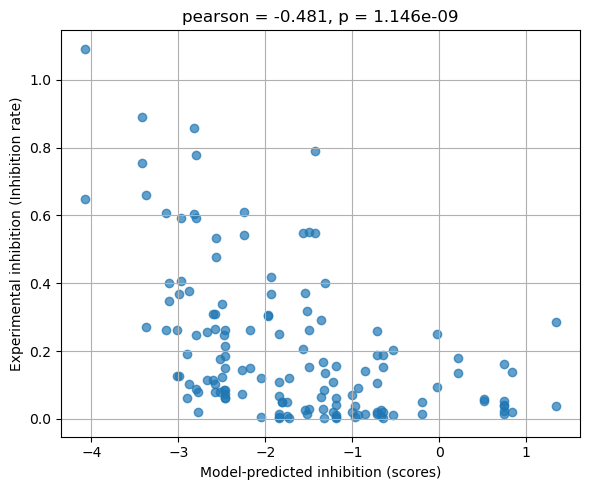

In [8]:
plt.figure(figsize=(6, 5))
plt.scatter(merged["scores"], merged["Inhibition rate"], alpha=0.7)
plt.xlabel("Model-predicted inhibition (scores)")
plt.ylabel("Experimental inhibition (Inhibition rate)")
plt.title(f"pearson = {corr:.3f}, p = {pval:.3e}")
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
print(f"pearson correlation: {corr:.3f}, p-value: {pval:.3e}")

pearson correlation: -0.481, p-value: 1.146e-09


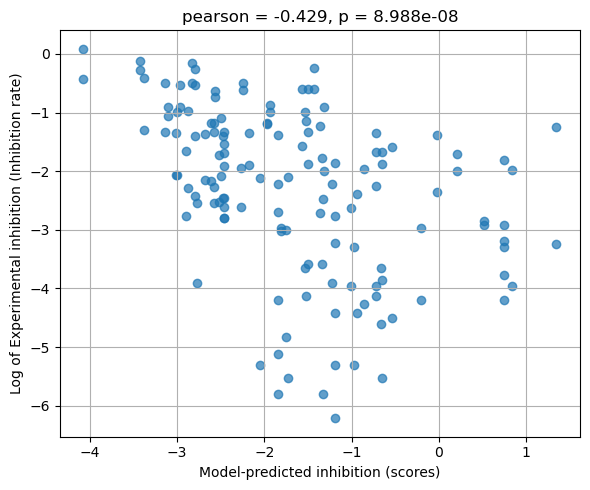

In [10]:
plt.figure(figsize=(6, 5))
plt.scatter(merged["scores"], merged["Log Inhibition rate"], alpha=0.7)
plt.xlabel("Model-predicted inhibition (scores)")
plt.ylabel("Log of Experimental inhibition (Inhibition rate)")
plt.title(f"pearson = {corr_2:.3f}, p = {pval_2:.3e}")
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
print(f"pearson correlation: {corr_2:.3f}, p-value: {pval_2:.3e}")

pearson correlation: -0.429, p-value: 8.988e-08
